## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER features gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [37]:
# csv: comma separated Values file
# csv files use a comma to separate each specific data value
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [225]:
data = pd.read_csv('/home/guida/LaboratoryOfComputationalPhysics/data_000637.txt')
N  = len(data)
data0=pd.DataFrame(data)
data0

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
5           1     0           63  3869200167        2762         4
6           1     0           61  3869200167        2772        14
7           1     0          139  3869200167        2776         0
8           1     0           62  3869200167        2774        21
9           1     0           60  3869200167        2788         7
10          1     1            7  3869200167        2785         4
11          1     0           64  3869200167        2786        19
12          1     1            6  3869200167        2792        18
13          1     0           36  3869200167        2791        23
14          1     0           56  3869200167        2789         3
15          1     1          139  3869200167        2797         0
16          1     1            8  3869200167        2787        14
17          1     0           63  3869200167        2790        10
18          1     1            5  3869200167        2795         4
19          1     0           53  3869200167        2796        26
20          1     1           10  3869200167        2789        14
21          1     0           57  3869200167        2789        10
22          1     0           61  3869200167        2790        23
23          1     0           38  3869200167        2799        15
24          1     0           58  3869200167        2795        19
25          1     0           62  3869200167        2797        14
26          1     0           59  3869200167        2799        14
27          1     0           59  3869200167        3081        21
28          1     0           61  3869200167        3081         1
29          1     0           60  3869200167        3083        20
...       ...   ...          ...         ...         ...       ...
1310690     1     1            1  3869211170        3517         5
1310691     1     0           56  3869211170        3516        21
1310692     1     1            8  3869211170        3516         7
1310693     1     0           58  3869211170        3521        14
1310694     1     1           12  3869211170        3524        15
1310695     1     1            2  3869211170        3527        24
1310696     1     0           63  3869211170        3526         2
1310697     1     1           10  3869211170        3525         3
1310698     1     0           60  3869211171           9         9
1310699     1     0           25  3869211171          11        28
1310700     1     0           28  3869211171           9        26
1310701     1     0          139  3869211171          21         0
1310702     1     0           27  3869211171          18        17
1310703     1     0           25  3869211171          20        13
1310704     1     0           26  3869211171          19        15
1310705     1     0           94  3869211171          43        22
1310706     1     0           28  3869211171          44        29
1310707     1     0           57  3869211171         137        29
1310708     1     0          124  3869211171         199         9
1310709     1     1           38  3869211171         417         8
1310710     1     1           36  3869211171         427        13
1310711     1     1           39  3869211171         430         0
1310712     1     1           35  3869211171         429         4
1310713     1     0           64  3869211171         758        18
1310714     1     0           60  3869211171         762         2
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764

In [217]:
x=data0["BX_COUNTER"].max()
print "The max count of BX_COUNTER [#] : ",x,"#"'\n'
print "The max of BX_COUNTER [ns]: ",x*25,"ns",'\n'
data0['time [ns]']=data0['TDC_MEAS']*(25./30.)+data0['ORBIT_CNT']*(25.*x)+x*25.
# I set the time zero to the data with a shorter measured time
print "Data taking lasted : ",round((data0['time [ns]'].max()-data0['time [ns]'].min())*10**-9,3), "s"

The max count of BX_COUNTER [#] :  3563 #

The max of BX_COUNTER [ns]:  89075 ns 

Data taking lasted :  0.98 s


In [219]:
data0["HEAD"]=np.random.randint(0,2,size=(len(data0.index)))
data0

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
5           0     0           63  3869200167        2762         4   
6           1     0           61  3869200167        2772        14   
7           1     0          139  3869200167        2776         0   
8           1     0           62  3869200167        2774        21   
9           1     0           60  3869200167        2788         7   
10          0     1            7  3869200167        2785         4   
11          0     0           64  3869200167        2786        19   
12          0     1            6  3869200167        2792        18   
13          0     0           36  3869200167        2791        23   
14          1     0           56  3869200167        2789         3   
15          1     1          139  3869200167        2797         0   
16          1     1            8  3869200167        2787        14   
17          1     0           63  3869200167        2790        10   
18          0     1            5  3869200167        2795         4   
19          1     0           53  3869200167        2796        26   
20          0     1           10  3869200167        2789        14   
21          1     0           57  3869200167        2789        10   
22          0     0           61  3869200167        2790        23   
23          1     0           38  3869200167        2799        15   
24          1     0           58  3869200167        2795        19   
25          0     0           62  3869200167        2797        14   
26          1     0           59  3869200167        2799        14   
27          1     0           59  3869200167        3081        21   
28          1     0           61  3869200167        3081         1   
29          1     0           60  3869200167        3083        20   
...       ...   ...          ...         ...         ...       ...   
1310690     1     1            1  3869211170        3517         5   
1310691     1     0           56  3869211170        3516        21   
1310692     1     1            8  3869211170        3516         7   
1310693     0     0           58  3869211170        3521        14   
1310694     0     1           12  3869211170        3524        15   
1310695     1     1            2  3869211170        3527        24   
1310696     1     0           63  3869211170        3526         2   
1310697     0     1           10  3869211170        3525         3   
1310698     1     0           60  3869211171           9         9   
1310699     0     0           25  3869211171          11        28   
1310700     0     0           28  3869211171           9        26   
1310701     1     0          139  3869211171          21         0   
1310702     1     0           27  3869211171          18        17   
1310703     0     0           25  3869211171          20        13   
1310704     1     0           26  3869211171          19        15   
1310705     0     0           94  3869211171          43        22   
1310706     0     0           28  3869211171          44        29   
1310707     1     0           57  3869211171         137        29   
1310708     0     0          124  3869211171         199         9   
1310709     0     1           38  3869211171         417         8   
1310710     0     1           36  3869211171         427        13   
1310711     1     1           39  3869211171         430         0   
1310712     1     1           35  3869211171         429         4   
1310713     0     0           64  3869211171         758        18   
1310714     0     0           60  3869211171         762         2   
1310715     0     0

In [220]:
data1=data0[data0["HEAD"]>0]
data1

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
6           1     0           61  3869200167        2772        14   
7           1     0          139  3869200167        2776         0   
8           1     0           62  3869200167        2774        21   
9           1     0           60  3869200167        2788         7   
14          1     0           56  3869200167        2789         3   
15          1     1          139  3869200167        2797         0   
16          1     1            8  3869200167        2787        14   
17          1     0           63  3869200167        2790        10   
19          1     0           53  3869200167        2796        26   
21          1     0           57  3869200167        2789        10   
23          1     0           38  3869200167        2799        15   
24          1     0           58  3869200167        2795        19   
26          1     0           59  3869200167        2799        14   
27          1     0           59  3869200167        3081        21   
28          1     0           61  3869200167        3081         1   
29          1     0           60  3869200167        3083        20   
32          1     0           61  3869200167        3085        25   
34          1     0           53  3869200167        3136        25   
36          1     0           59  3869200167        3176         8   
39          1     0          139  3869200167        3186         0   
41          1     0           56  3869200167        3177        20   
43          1     1            1  3869200168           7        18   
44          1     0           64  3869200168           7        16   
48          1     0          139  3869200168          23         0   
49          1     0           61  3869200168          18        17   
50          1     0           62  3869200168          21         9   
...       ...   ...          ...         ...         ...       ...   
1310666     1     0           64  3869211170        3025         1   
1310667     1     0           41  3869211170        3033        27   
1310668     1     0           47  3869211170        3033        19   
1310669     1     0           50  3869211170        3029        27   
1310670     1     0           61  3869211170        3025         1   
1310671     1     0           37  3869211170        3034        11   
1310673     1     0           57  3869211170        3038        10   
1310674     1     0           62  3869211170        3025        27   
1310676     1     0           62  3869211170        3032         3   
1310677     1     0           46  3869211170        3040        28   
1310679     1     0           47  3869211170        3040         2   
1310680     1     0           47  3869211170        3048        11   
1310682     1     0           47  3869211170        3053        12   
1310684     1     0           46  3869211170        3222        14   
1310688     1     1          109  3869211170        3421        12   
1310689     1     0           28  3869211170        3507        18   
1310690     1     1            1  3869211170        3517         5   
1310691     1     0           56  3869211170        3516        21   
1310692     1     1            8  3869211170        3516         7   
1310695     1     1            2  3869211170        3527        24   
1310696     1     0           63  3869211170        3526         2   
1310698     1     0           60  3869211171           9         9   
1310701     1     0          139  3869211171          21         0   
1310702     1     0           27  3869211171          18        17   
1310704     1     0           26  3869211171          19        15   
1310707     1     0

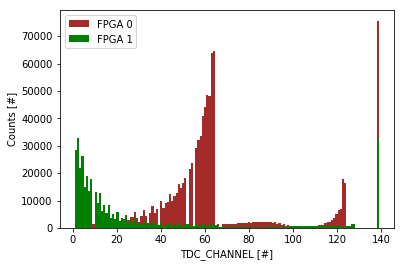

In [221]:
set0 = data[data['FPGA'] == 0]['TDC_CHANNEL']
set1 = data[data['FPGA'] == 1]['TDC_CHANNEL']
plt.hist(set0, color='brown', bins=set0.max(), label="FPGA 0")
plt.hist(set1, color='green', bins=set1.max(), label="FPGA 1")
plt.legend()
plt.xlabel("TDC_CHANNEL [#]")
plt.ylabel("Counts [#]")
plt.show()

In [222]:
print "FPGA = 0 : \n ", data[data['FPGA'] == 0].groupby(['TDC_CHANNEL']).FPGA.count().nlargest(3)
print "FPGA = 1 : \n ",data[data['FPGA'] == 1].groupby(['TDC_CHANNEL']).FPGA.count().nlargest(3)

FPGA = 0 : 
  TDC_CHANNEL
139    75617
64     64581
63     63724
Name: FPGA, dtype: int64
FPGA = 1 : 
  TDC_CHANNEL
2      32669
139    32442
1      28438
Name: FPGA, dtype: int64


In [223]:
print "Numbers of unique orbits : " , len(data.ORBIT_CNT.unique())
print "Number of unique orbits with at least one measurement from TDC_CHANNEL=139 : ", len(data[data['TDC_CHANNEL']==139].ORBIT_CNT.unique())

Numbers of unique orbits :  11001
Number of unique orbits with at least one measurement from TDC_CHANNEL=139 :  10976
